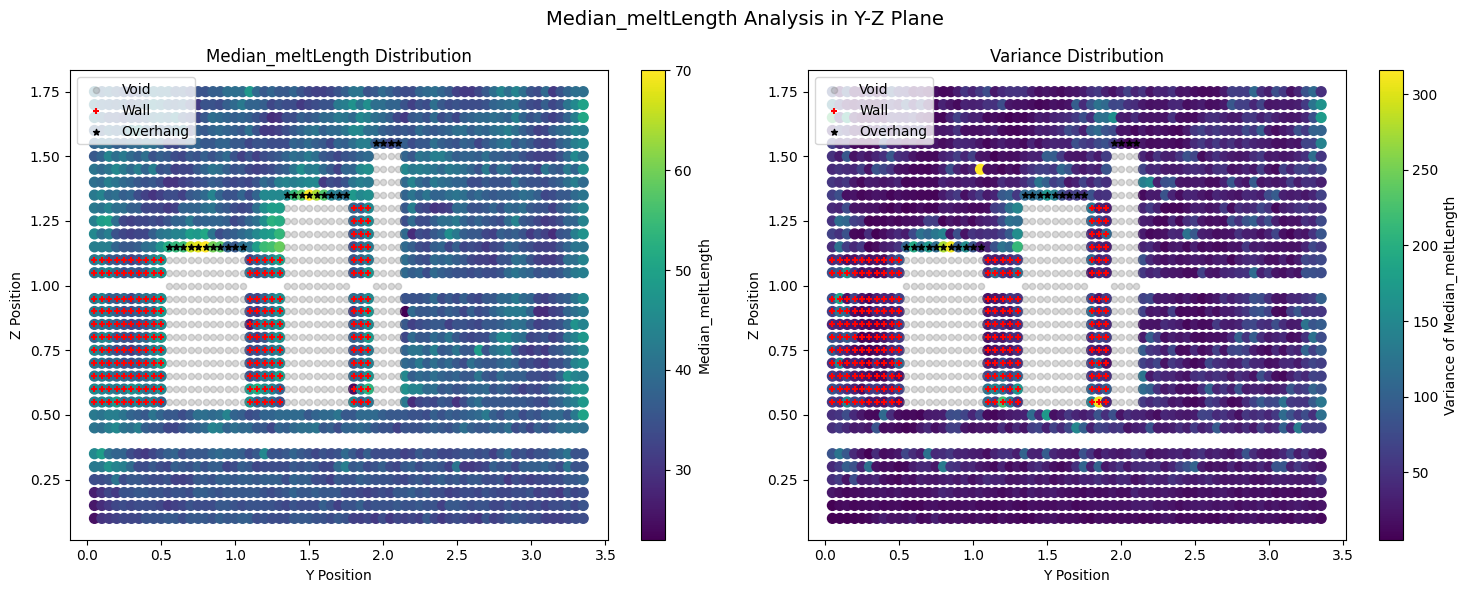

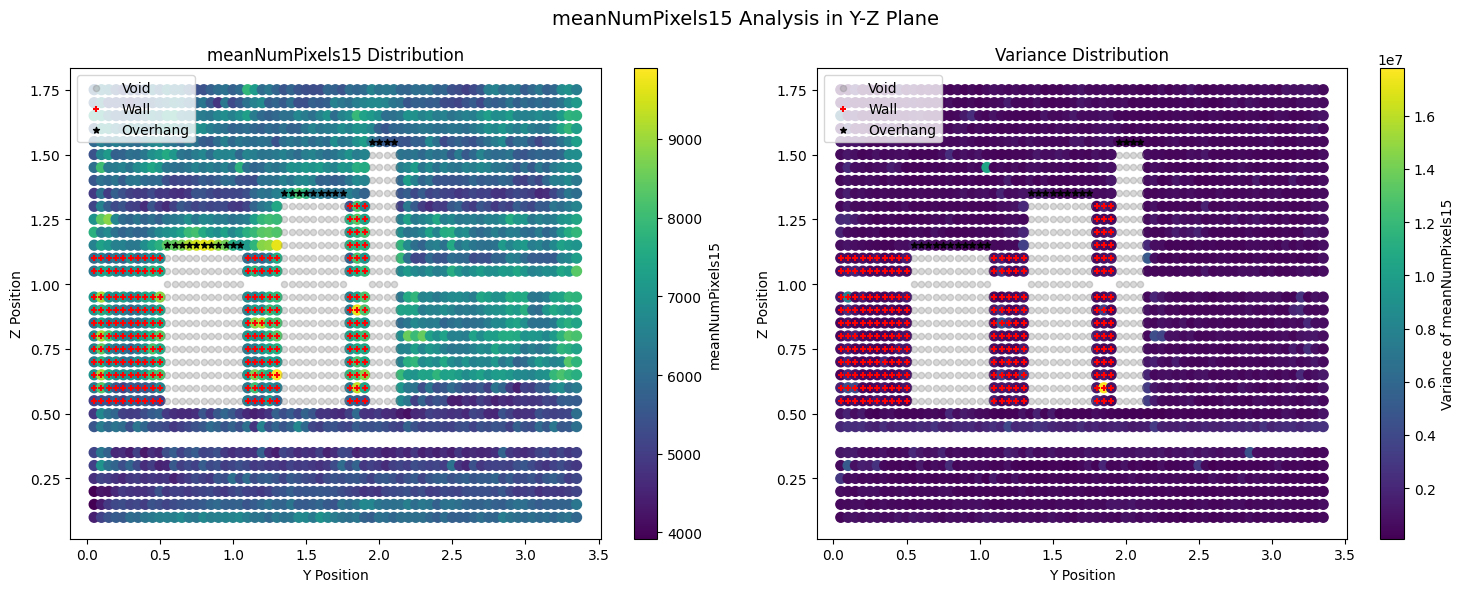

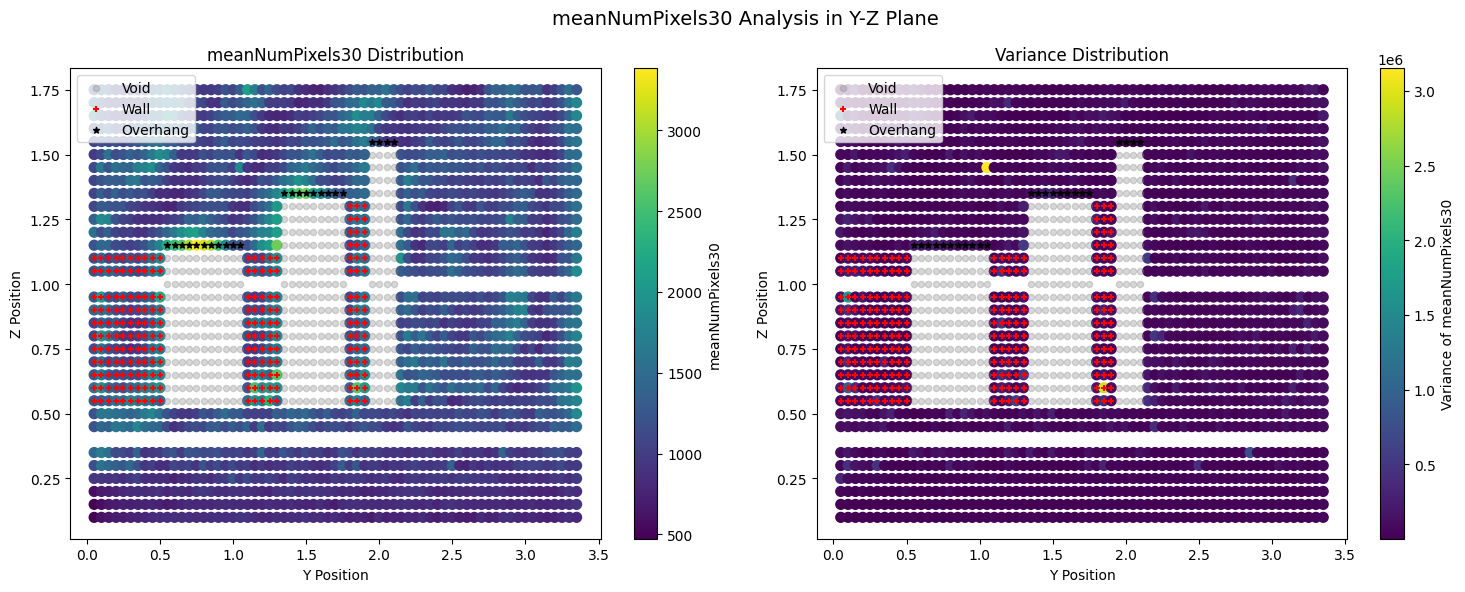

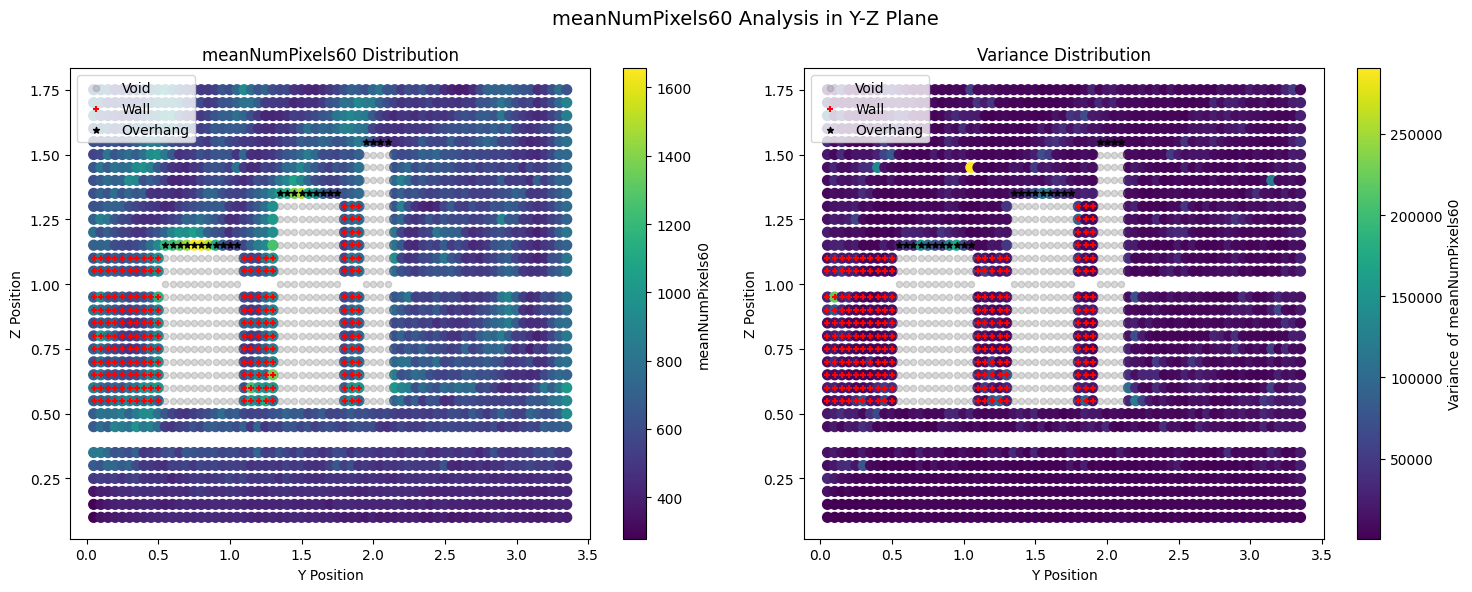

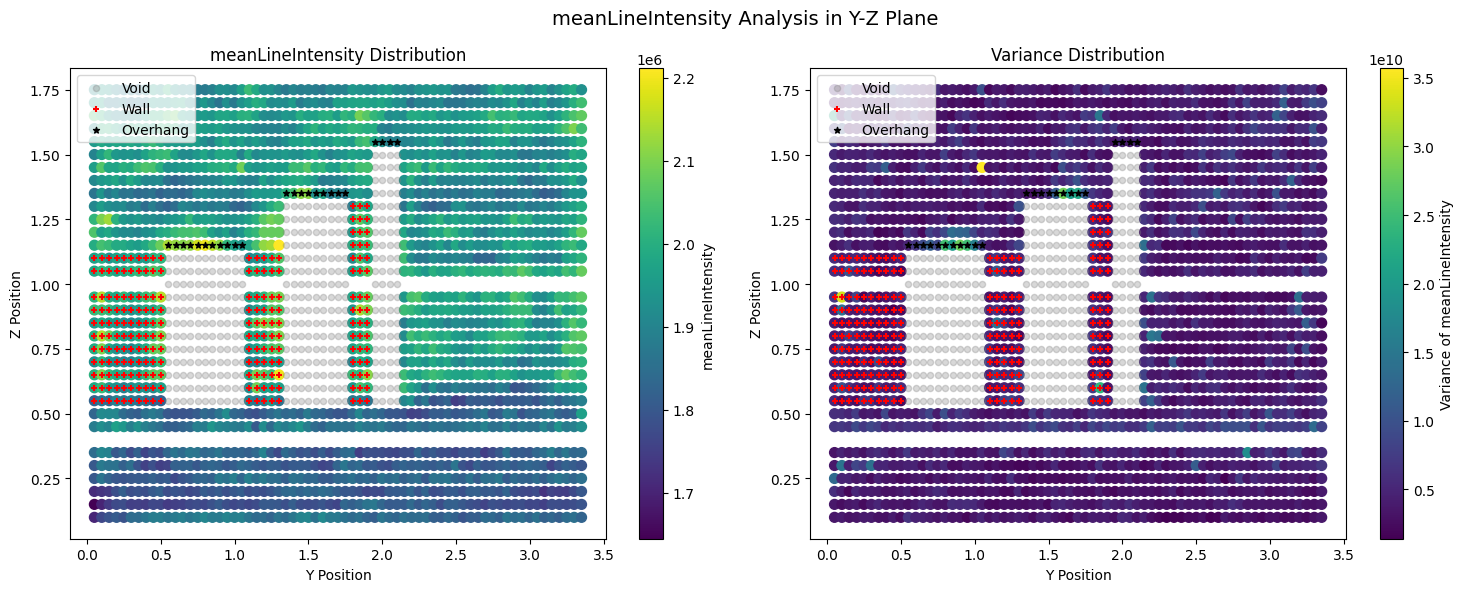

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# Read the data
data = pd.read_csv('data.txt')

# Define metrics to analyze
metrics = {
    'Median_meltLength': 'varMeltLength',
    'meanNumPixels15': 'varNumPixels15',
    'meanNumPixels30': 'varNumPixels30',
    'meanNumPixels60': 'varNumPixels60',
    'meanLineIntensity': 'varLineIntensity'
}

# Create Y-Z plane scatter plots
for metric, var_metric in metrics.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'{metric} Analysis in Y-Z Plane', fontsize=14)
    
    # Mean/Median plot
    scatter1 = ax1.scatter(data['Y_Start'], data['Z'], c=data[metric], 
                          cmap='viridis', s=50)
    
    # Create points for void regions with correct step size and ranges
    # Cavity 1: 0.55 to 1.05, step 0.05
    y_void1 = np.arange(0.55, 1.1, 0.05)
    z_void1 = np.arange(0.55, 1.15, 0.05)
    Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
    void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))
    
    # Cavity 2: 1.35 to 1.75, step 0.05
    y_void2 = np.arange(1.35, 1.8, 0.05)
    z_void2 = np.arange(0.55, 1.35, 0.05)
    Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
    void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))
    
    # Cavity 3: 1.95 to 2.10, step 0.05
    y_void3 = np.arange(1.95, 2.15, 0.05)
    z_void3 = np.arange(0.55, 1.55, 0.05)
    Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
    void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))
    
    # Combine all void points
    void_points = np.vstack((void_points1, void_points2, void_points3))
    
    # Add markers for Wall, Overhang, and Voids
    wall_mask = data['Wall'] > 0
    overhang_mask = data['Overhang'] > 0
    
    ax1.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')
    ax1.scatter(data[wall_mask]['Y_Start'], data[wall_mask]['Z'], 
               marker='+', s=20, c='red', label='Wall')
    ax1.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
               marker='*', s=20, c='black', label='Overhang')
    
    plt.colorbar(scatter1, ax=ax1, label=metric)
    ax1.set_xlabel('Y Position')
    ax1.set_ylabel('Z Position')
    ax1.set_title(f'{metric} Distribution')
    ax1.legend(loc='upper left')
    
    # Variance plot
    scatter2 = ax2.scatter(data['Y_Start'], data['Z'], c=data[var_metric], 
                          cmap='viridis', s=50)
    
    # Add same markers to variance plot
    ax2.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')
    ax2.scatter(data[wall_mask]['Y_Start'], data[wall_mask]['Z'], 
                marker='+', s=20, c='red', label='Wall')
    ax2.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
                marker='*', s=20, c='black', label='Overhang')
    
    plt.colorbar(scatter2, ax=ax2, label=f'Variance of {metric}')
    ax2.set_xlabel('Y Position')
    ax2.set_ylabel('Z Position')
    ax2.set_title(f'Variance Distribution')
    ax2.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

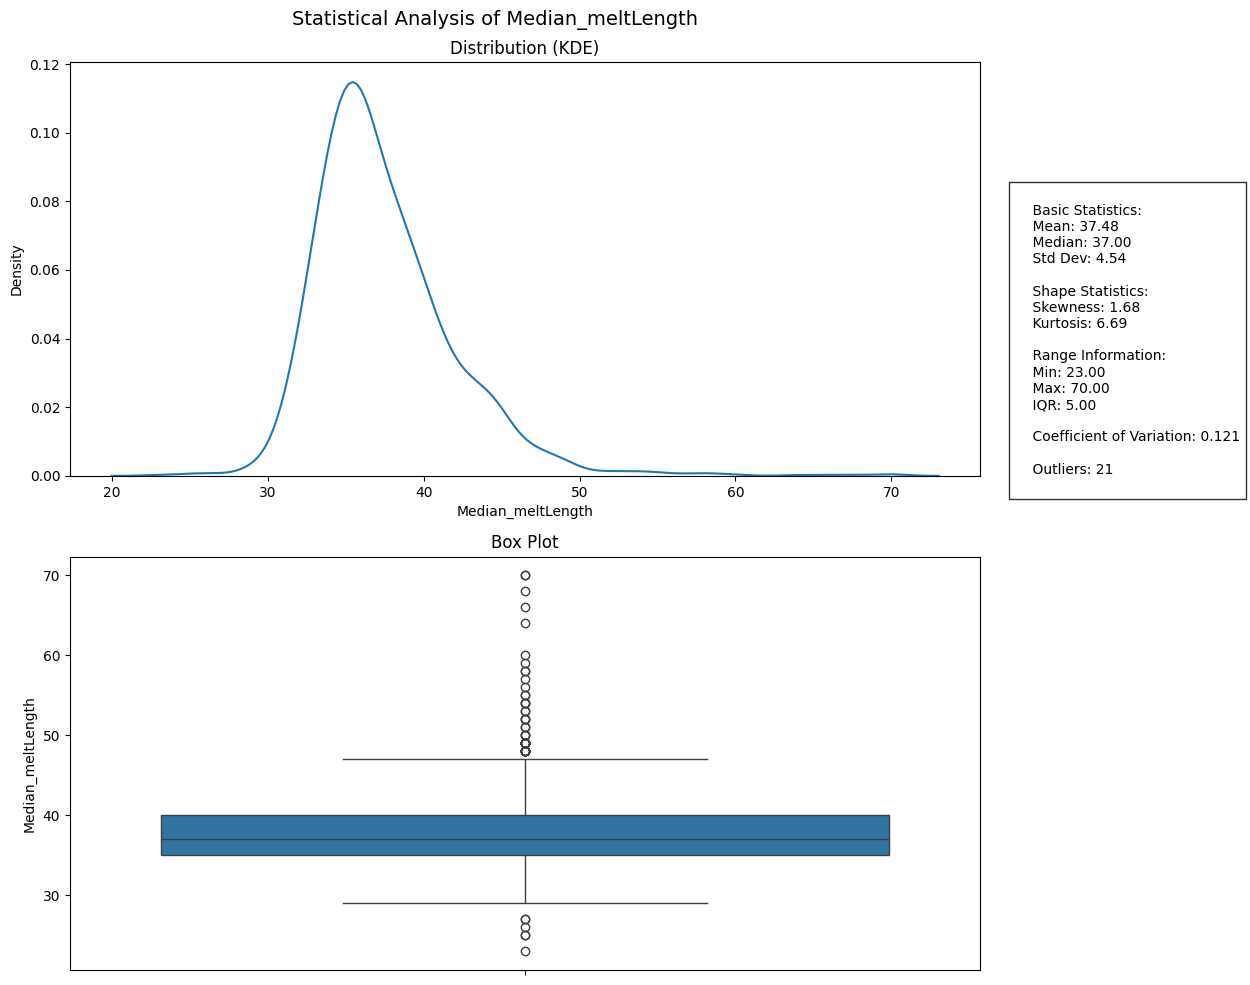

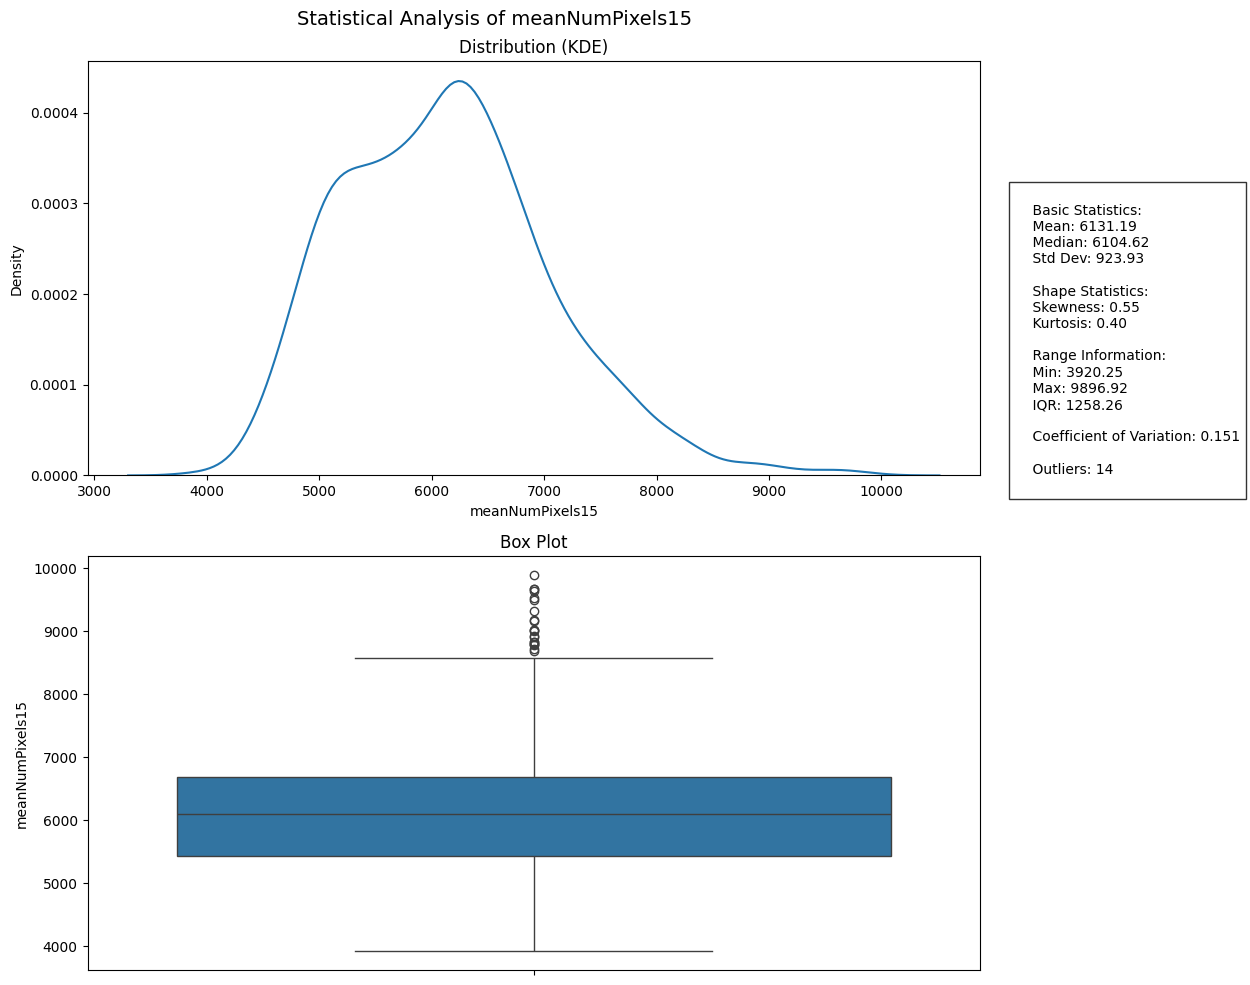

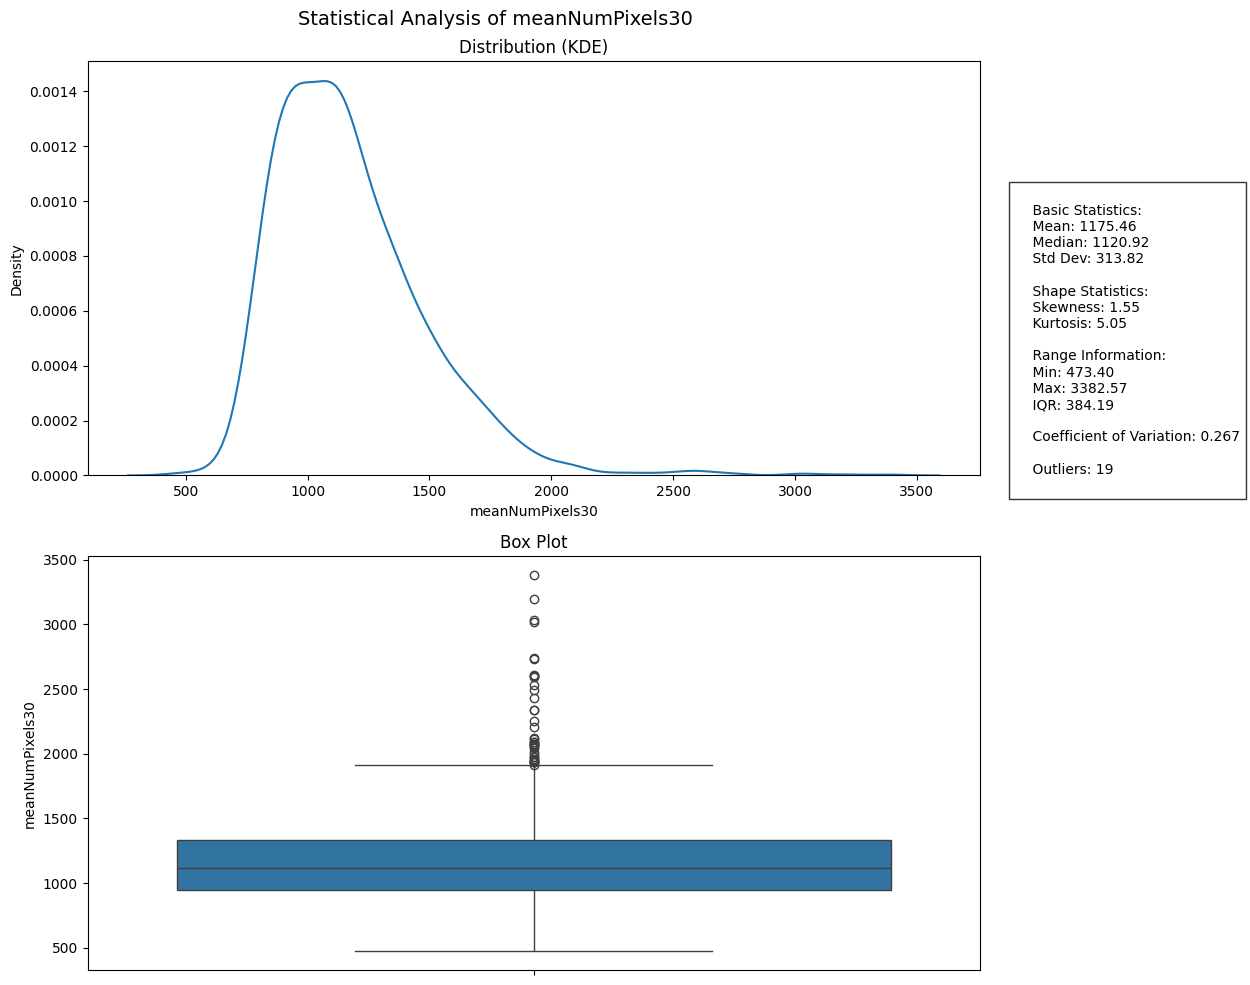

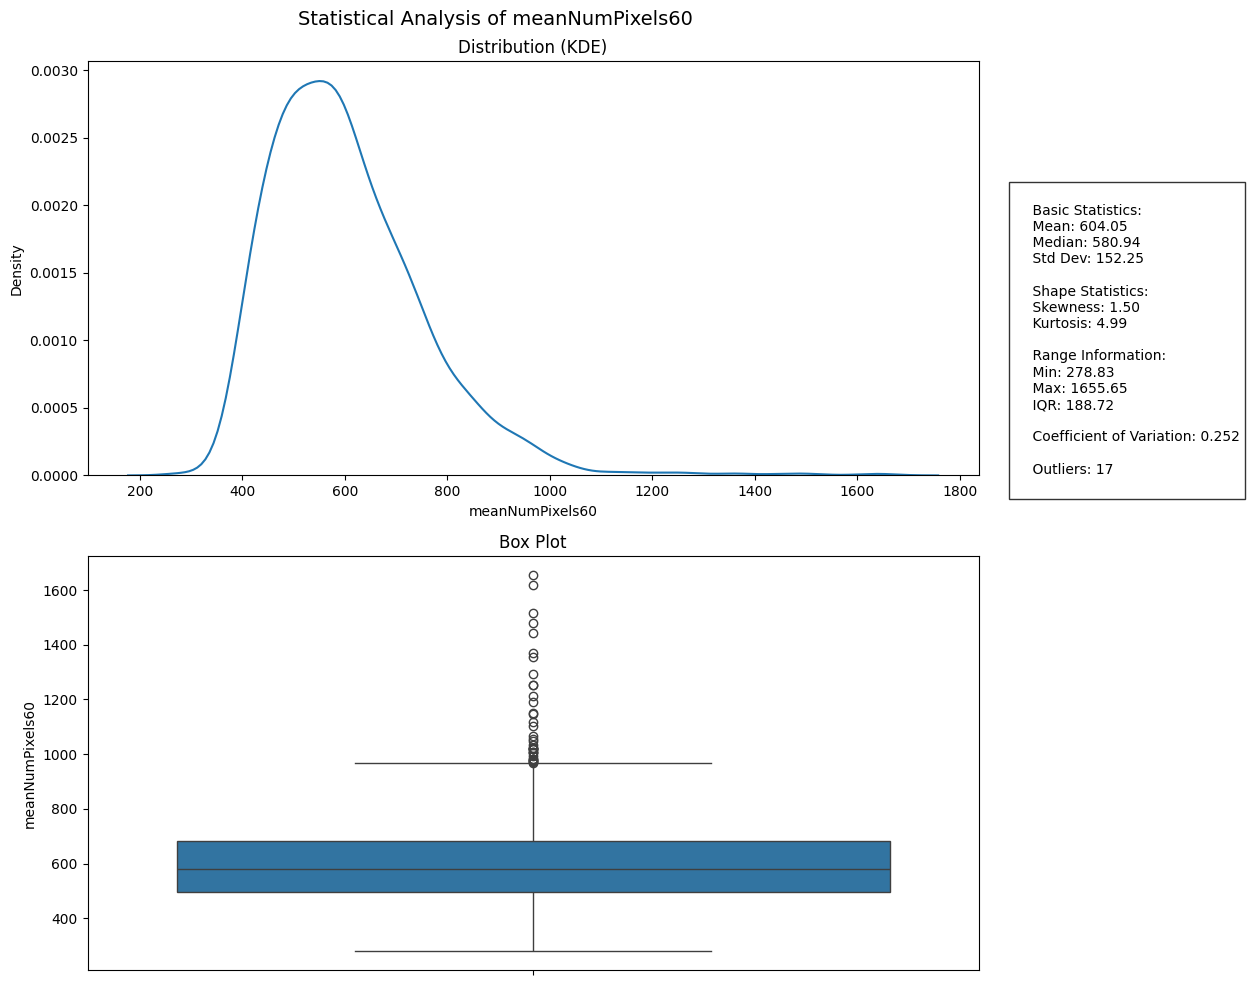

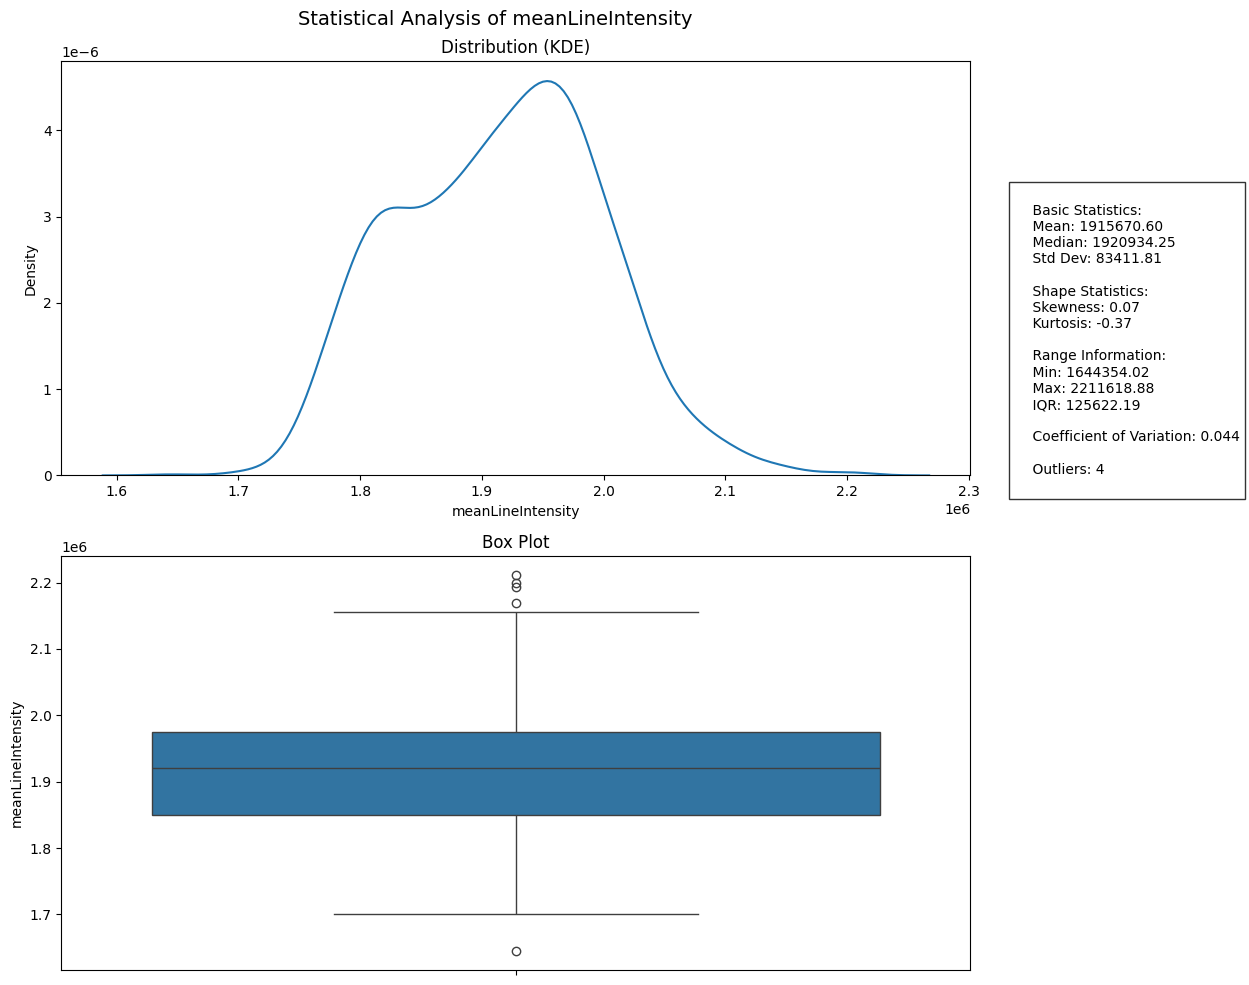

In [2]:
# Create statistical analysis plots
for metric, var_metric in metrics.items():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle(f'Statistical Analysis of {metric}', fontsize=14)
    
    # KDE plot
    sns.kdeplot(data=data, x=metric, ax=ax1)
    ax1.set_title('Distribution (KDE)')
    ax1.set_xlabel(metric)
    ax1.set_ylabel('Density')
    
    # Box plot
    sns.boxplot(y=data[metric], ax=ax2)
    ax2.set_title('Box Plot')
    ax2.set_ylabel(metric)
    
    # Calculate statistics
    stats_text = f"""
    Basic Statistics:
    Mean: {data[metric].mean():.2f}
    Median: {data[metric].median():.2f}
    Std Dev: {data[metric].std():.2f}
    
    Shape Statistics:
    Skewness: {data[metric].skew():.2f}
    Kurtosis: {data[metric].kurtosis():.2f}
    
    Range Information:
    Min: {data[metric].min():.2f}
    Max: {data[metric].max():.2f}
    IQR: {data[metric].quantile(0.75) - data[metric].quantile(0.25):.2f}
    
    Coefficient of Variation: {(data[metric].std() / data[metric].mean()):.3f}
    
    Outliers: {len(data[data[metric] > data[metric].mean() + 3*data[metric].std()])}
    """
    
    # Add text box with statistics
    plt.figtext(1.02, 0.5, stats_text, fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

In [3]:
data['Y_Start'][data['Overhang'] > 0]

617     0.55
618     0.60
619     0.65
620     0.70
621     0.75
622     0.80
623     0.85
624     0.90
625     0.95
626     1.00
627     1.05
849     1.35
850     1.40
851     1.45
852     1.50
853     1.55
854     1.60
855     1.65
856     1.70
857     1.75
1180    1.95
1181    2.00
1182    2.05
1183    2.10
Name: Y_Start, dtype: float64

In [4]:
data['Z'][data['Overhang'] > 0]

617     1.15
618     1.15
619     1.15
620     1.15
621     1.15
622     1.15
623     1.15
624     1.15
625     1.15
626     1.15
627     1.15
849     1.35
850     1.35
851     1.35
852     1.35
853     1.35
854     1.35
855     1.35
856     1.35
857     1.35
1180    1.55
1181    1.55
1182    1.55
1183    1.55
Name: Z, dtype: float64

In [5]:
# First find global boundaries
y_min = data['Y_Start'].min()  # should be 0.05
y_max = data['Y_Start'].max()  # should be 3.35
z_min = data['Z'].min()        # should be 0.1
z_max = data['Z'].max()        # should be 1.75

y_min, y_max, z_min, z_max

(np.float64(0.05), np.float64(3.35), np.float64(0.1), np.float64(1.75))

In [6]:
import numpy as np
import pandas as pd

def calculate_d_edge_left(data):
    # First find global boundaries
    y_min = data['Y_Start'].min()  # should be 0.05
    y_max = data['Y_Start'].max()  # should be 3.35
    z_min = data['Z'].min()        # should be 0.1
    z_max = data['Z'].max()        # should be 1.75

    # Define cavity edges (y coordinates for each cavity)
    cavity_edges = [
        # Cavity 1
        [(0.55, 1.05), (0.55, 1.10)],  # (y_min, z_max)
        # Cavity 2
        [(1.35, 1.75), (0.55, 1.30)],
        # Cavity 3
        [(1.95, 2.10), (0.55, 1.50)]
    ]

    # Initialize d_edge column
    data['d_edge_left'] = 0.05

    # Calculate d_edge for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']
        
        # Initialize distances list with distances to global boundaries
        distances = [
            abs(y - y_min)
        ]       
        # Check each cavity
        for (y_min_cav, y_max_cav), (z_min_cav, z_max_cav) in cavity_edges:
            # Only consider cavity edges if we're at the right z level
            if z_min_cav <= z <= z_max_cav:
                # Add distances to cavity edges if we're past that edge
                if y > y_max_cav:
                    distances.append(abs(y - y_max_cav))
        
        # Get minimum distance, but ensure it's at least 0.05
        d_edge = max(min(distances), 0.05)
        data.at[idx, 'd_edge_left'] = d_edge

    return data


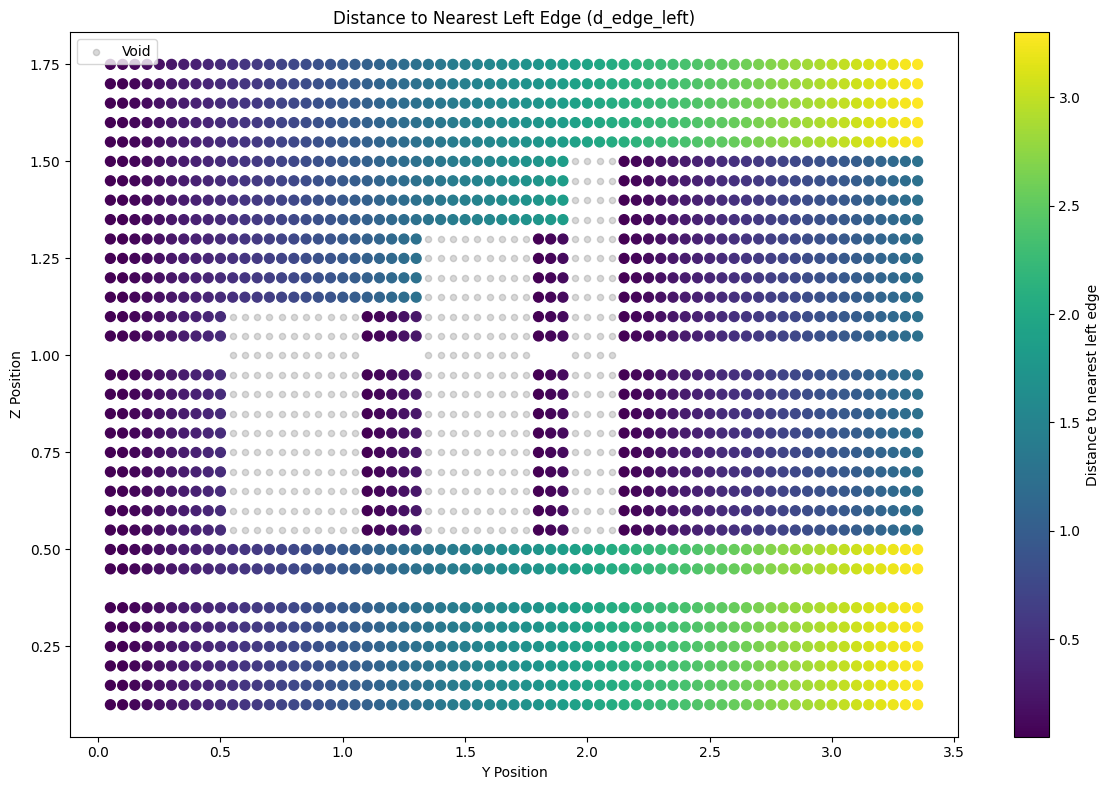

In [7]:
import matplotlib.pyplot as plt

# Calculate d_edge
data = calculate_d_edge_left(data)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_edge values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_edge_left'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest left edge')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Left Edge (d_edge_left)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
def calculate_d_edge_right(data):
    # First find global boundaries
    y_min = data['Y_Start'].min()  # should be 0.05
    y_max = data['Y_Start'].max()  # should be 3.35
    z_min = data['Z'].min()        # should be 0.1
    z_max = data['Z'].max()        # should be 1.75

    # Define cavity edges (y coordinates for each cavity)
    cavity_edges = [
        # Cavity 1
        [(0.55, 1.05), (0.55, 1.10)],  # (y_min, z_max)
        # Cavity 2
        [(1.35, 1.75), (0.55, 1.30)],
        # Cavity 3
        [(1.95, 2.10), (0.55, 1.50)]
    ]

    # Initialize d_edge column
    data['d_edge_right'] = 0.0

    # Calculate d_edge for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']
        
        # Initialize distances list with distances to global boundaries
        distances = [
            abs(y - y_max)   # distance to right boundary
        ]       
        # Check each cavity
        for (y_min_cav, y_max_cav), (z_min_cav, z_max_cav) in cavity_edges:
            # Only consider cavity edges if we're at the right z level
            if z_min_cav <= z <= z_max_cav:
                # Add distances to cavity edges if we're not past that cavity
                if y < y_min_cav:
                    distances.append(abs(y - y_min_cav))
        
        # Get minimum distance, but ensure it's at least 0.05
        d_edge = max(min(distances), 0.05)
        data.at[idx, 'd_edge_right'] = d_edge

    return data



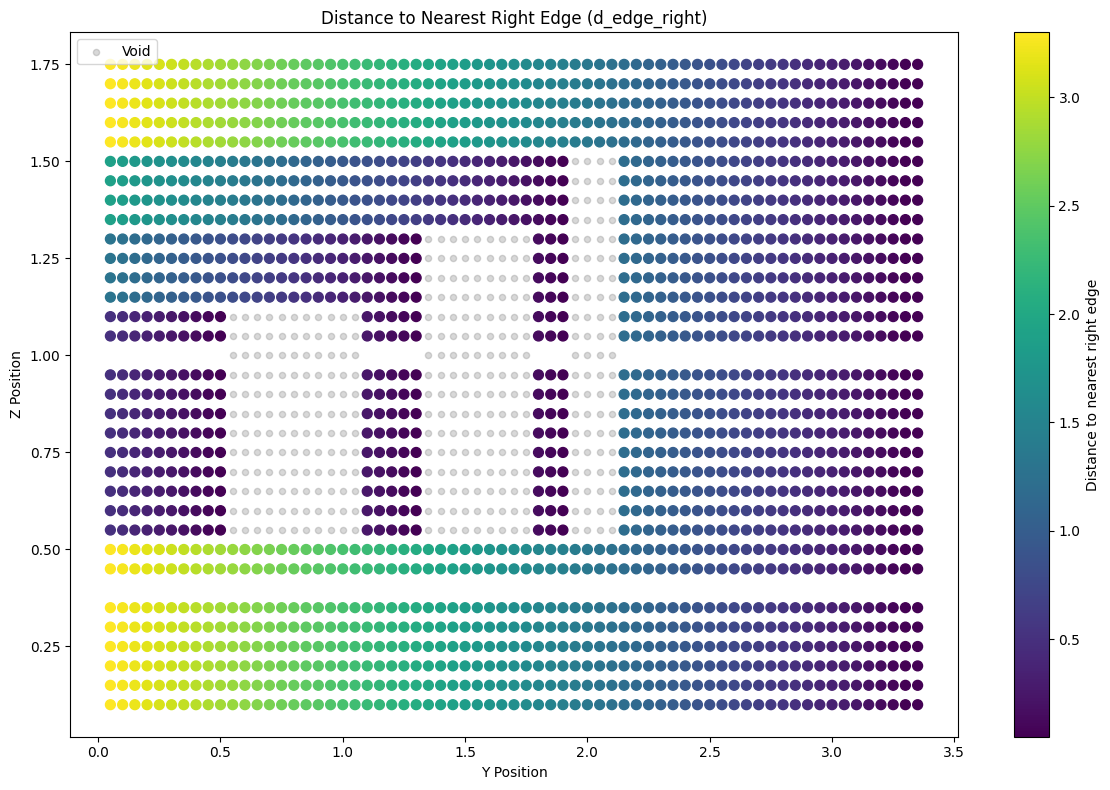

In [9]:
import matplotlib.pyplot as plt

# Calculate d_edge
data = calculate_d_edge_right(data)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_edge values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_edge_right'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest right edge')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Right Edge (d_edge_right)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
#scanning away from an adiabatic boundary is less important than scanning towards it.
# d_edge_left 
# d_edge_right 

In [11]:
def calculate_d_over_left(data):
    default_value = max(data['Y_Start']) - min(data['Y_Start'])
    overhang_values = data[data['Overhang'] > 0]['Overhang'].unique()

    # Create dictionary of overhang regions
    overhang_regions = {}
    for i in overhang_values:
        ys = data['Y_Start'][data['Overhang'] == i]
        zs = data['Z'][data['Overhang'] == i]
        overhang_regions[i] = {
            'y_min': ys.min(),
            'y_max': ys.max(),
            'z_start': zs.min(),
            'z_end': data['Z'].max()
        }

    # Calculate d_over for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']

        # check which overhang region can be influential
        infl_overs = []
        for index, reg in overhang_regions.items():
            if z >= reg['z_start'] and y > reg['y_max']:
                infl_overs.append(index)

        # First check if point is in any overhang region
        in_overhang = False
        for index in overhang_regions:
            if (y >= overhang_regions[index]['y_min'] and 
                y <= overhang_regions[index]['y_max'] and 
                z >= overhang_regions[index]['z_start']):
                in_overhang = True
                break

        if in_overhang:
            d_over = 0
        else:
            # calculate distances to overhang edges
            distances = []
            for index in infl_overs:
                distances.append(abs(y-overhang_regions[index]['y_max']))

            if distances:
                d_over = max(min(distances), 0.05)
            else:
                d_over = default_value

        data.at[idx, 'd_over_left'] = d_over
    
    return data

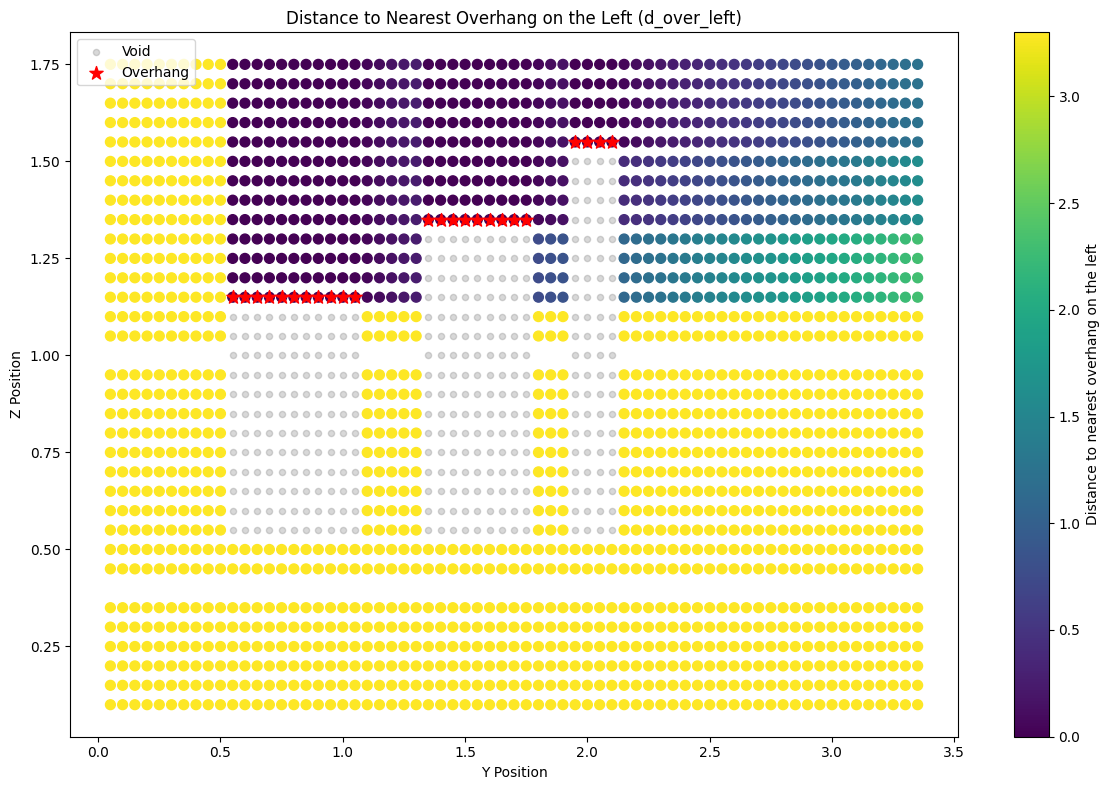

In [12]:
# Calculate d_over_left
data = calculate_d_over_left(data)

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_over values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_over_left'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add markers for overhang regions
overhang_mask = data['Overhang'] > 0
ax.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
          marker='*', s=100, c='red', label='Overhang')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest overhang on the left')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Overhang on the Left (d_over_left)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
def calculate_d_over_right(data):
    default_value = max(data['Y_Start']) - min(data['Y_Start'])
    overhang_values = data[data['Overhang'] > 0]['Overhang'].unique()

    # Create dictionary of overhang regions
    overhang_regions = {}
    for i in overhang_values:
        ys = data['Y_Start'][data['Overhang'] == i]
        zs = data['Z'][data['Overhang'] == i]
        overhang_regions[i] = {
            'y_min': ys.min(),
            'y_max': ys.max(),
            'z_start': zs.min(),
            'z_end': data['Z'].max()
        }

    # Calculate d_over for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']

        # check which overhang region can be influential
        infl_overs = []
        for index, reg in overhang_regions.items():
            if z >= reg['z_start'] and y < reg['y_min']:
                infl_overs.append(index)

        # First check if point is in any overhang region
        in_overhang = False
        for index in overhang_regions:
            if (y >= overhang_regions[index]['y_min'] and 
                y <= overhang_regions[index]['y_max'] and 
                z >= overhang_regions[index]['z_start']):
                in_overhang = True
                break

        if in_overhang:
            d_over = 0
        else:
            # calculate distances to overhang edges
            distances = []
            for index in infl_overs:
                distances.append(abs(y-overhang_regions[index]['y_min']))

            if distances:
                d_over = max(min(distances), 0.05)
            else:
                d_over = default_value

        data.at[idx, 'd_over_right'] = d_over
    
    return data

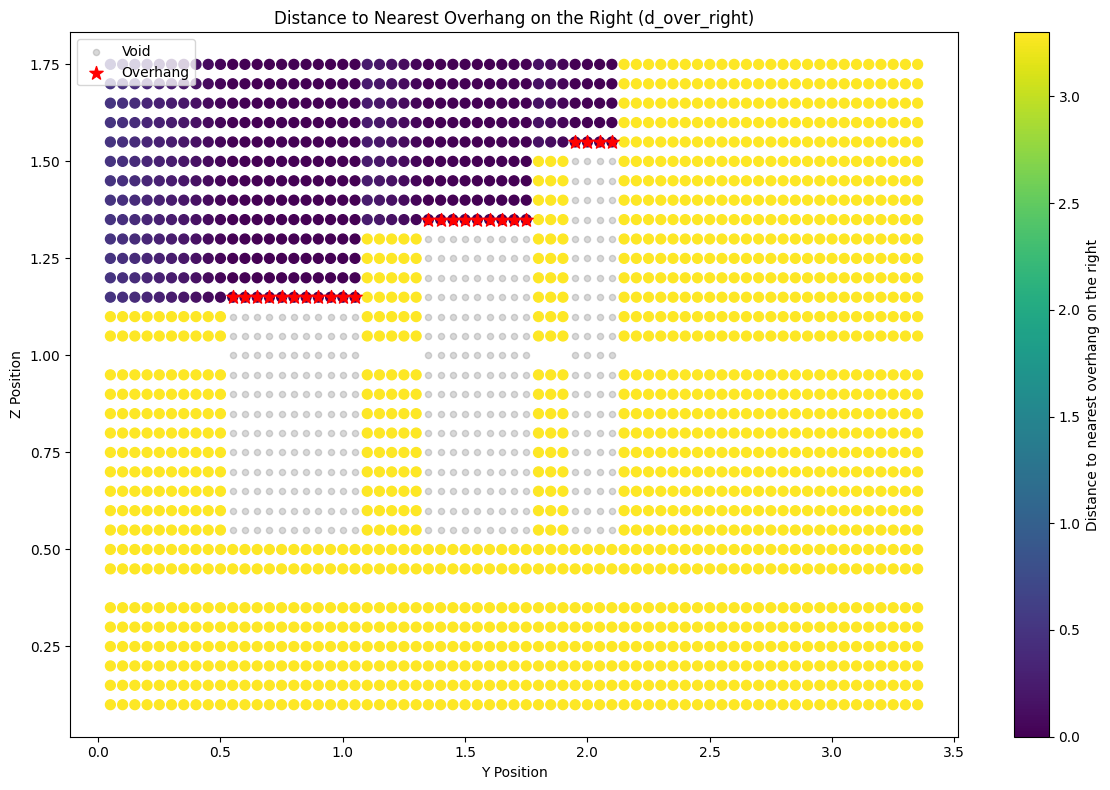

In [14]:
# Calculate d_over_right
data = calculate_d_over_right(data)

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_over values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_over_right'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add markers for overhang regions
overhang_mask = data['Overhang'] > 0
ax.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
          marker='*', s=100, c='red', label='Overhang')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest overhang on the right')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Overhang on the Right (d_over_right)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

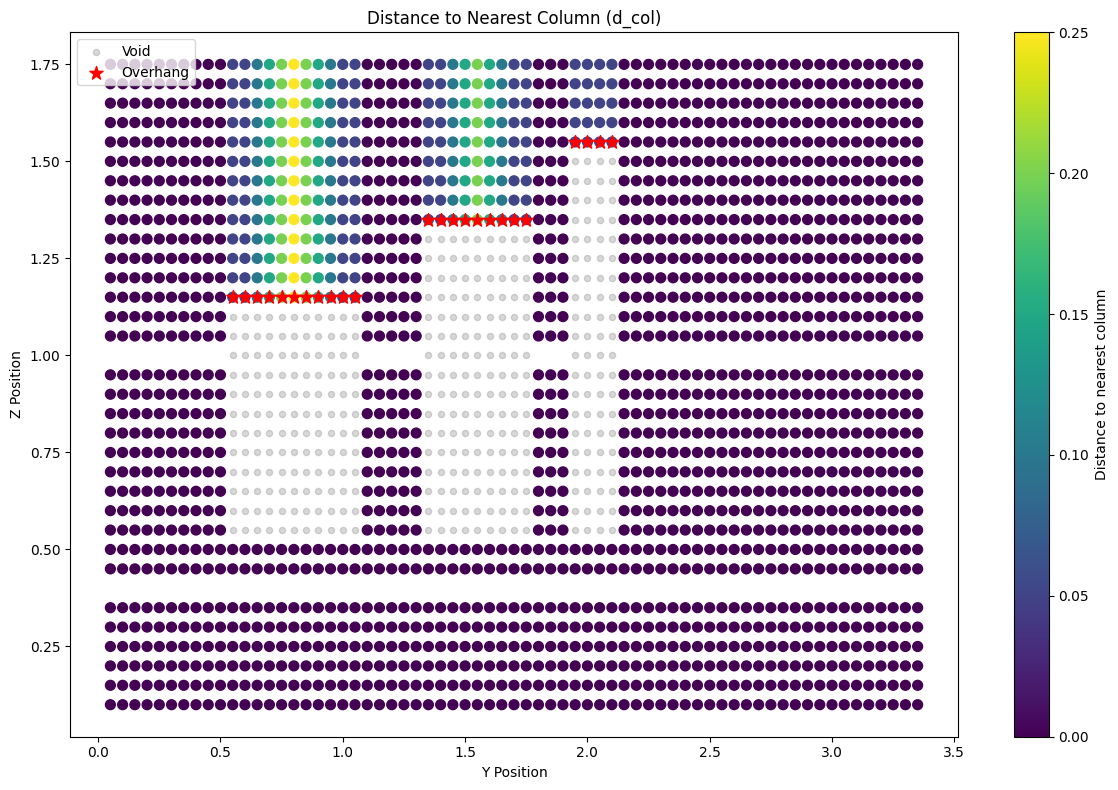

In [15]:
def calculate_d_col(data):
    overhang_values = data[data['Overhang'] > 0]['Overhang'].unique()

    # Create dictionary of overhang regions
    overhang_regions = {}
    for i in overhang_values:
        ys = data['Y_Start'][data['Overhang'] == i]
        zs = data['Z'][data['Overhang'] == i]
        overhang_regions[i] = {
            'y_min': ys.min(),
            'y_max': ys.max(),
            'z_start': zs.min(),
            'z_end': data['Z'].max()
        }

    # Calculate d_col for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']

        # Default is 0
        d_col = 0

        # Check if point is in any overhang region
        for index, reg in overhang_regions.items():
            if (z >= reg['z_start'] and 
                y >= reg['y_min'] and y <= reg['y_max']):
                # Calculate distance to nearest edge of overhang
                d_col = min(abs(y - reg['y_min']), abs(y - reg['y_max']))
                d_col = max(d_col, 0.05)  # Ensure minimum distance is 0.05
                break

        data.at[idx, 'd_col'] = d_col
    
    return data

# Calculate d_col
data = calculate_d_col(data)

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_col values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_col'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add markers for overhang regions
overhang_mask = data['Overhang'] > 0
ax.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
          marker='*', s=100, c='red', label='Overhang')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest column')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Column (d_col)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

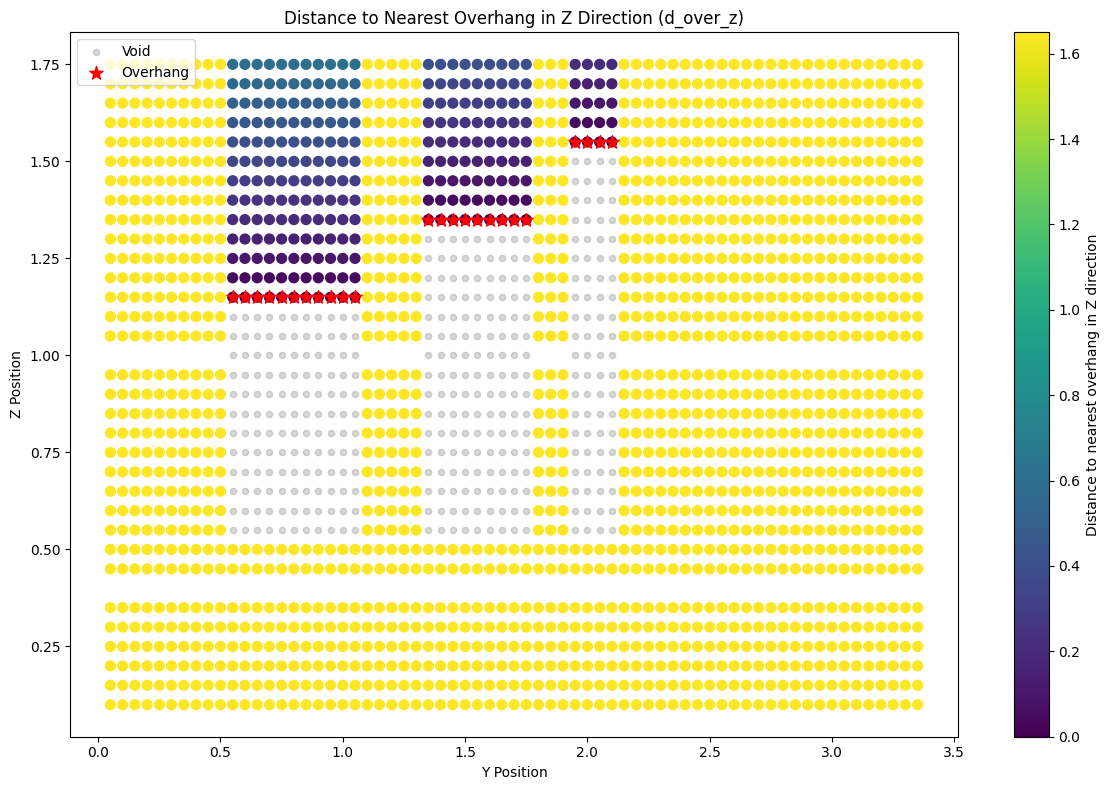

In [16]:
def calculate_d_over_z(data):
    default_value = max(data['Z']) - min(data['Z'])
    overhang_values = data[data['Overhang'] > 0]['Overhang'].unique()

    # Create dictionary of overhang regions
    overhang_regions = {}
    for i in overhang_values:
        ys = data['Y_Start'][data['Overhang'] == i]
        zs = data['Z'][data['Overhang'] == i]
        overhang_regions[i] = {
            'y_min': ys.min(),
            'y_max': ys.max(),
            'z_over': zs.min()  # z position of the overhang
        }

    # Calculate d_over_z for each point
    for idx, row in data.iterrows():
        y = row['Y_Start']
        z = row['Z']

        # Default to high value
        d_over_z = default_value

        # Check if point is in any overhang region (in y)
        for index, reg in overhang_regions.items():
            if (y >= reg['y_min'] and y <= reg['y_max'] and z >= reg['z_over']):
                # Calculate vertical distance
                d_over_z = abs(z - reg['z_over'])
                break

        data.at[idx, 'd_over_z'] = d_over_z
    
    return data

# Calculate d_over_z
data = calculate_d_over_z(data)

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with d_over_z values
scatter = ax.scatter(data['Y_Start'], data['Z'], c=data['d_over_z'], 
                    cmap='viridis', s=50)

# Add void points for reference
# Cavity 1
y_void1 = np.arange(0.55, 1.1, 0.05)
z_void1 = np.arange(0.55, 1.15, 0.05)
Y_void1, Z_void1 = np.meshgrid(y_void1, z_void1)
void_points1 = np.column_stack((Y_void1.ravel(), Z_void1.ravel()))

# Cavity 2
y_void2 = np.arange(1.35, 1.8, 0.05)
z_void2 = np.arange(0.55, 1.35, 0.05)
Y_void2, Z_void2 = np.meshgrid(y_void2, z_void2)
void_points2 = np.column_stack((Y_void2.ravel(), Z_void2.ravel()))

# Cavity 3
y_void3 = np.arange(1.95, 2.15, 0.05)
z_void3 = np.arange(0.55, 1.55, 0.05)
Y_void3, Z_void3 = np.meshgrid(y_void3, z_void3)
void_points3 = np.column_stack((Y_void3.ravel(), Z_void3.ravel()))

# Combine all void points
void_points = np.vstack((void_points1, void_points2, void_points3))

# Add void points
ax.scatter(void_points[:,0], void_points[:,1], c='gray', s=20, alpha=0.3, label='Void')

# Add markers for overhang regions
overhang_mask = data['Overhang'] > 0
ax.scatter(data[overhang_mask]['Y_Start'], data[overhang_mask]['Z'], 
          marker='*', s=100, c='red', label='Overhang')

# Add colorbar
plt.colorbar(scatter, label='Distance to nearest overhang in Z direction')

# Labels and title
ax.set_xlabel('Y Position')
ax.set_ylabel('Z Position')
ax.set_title('Distance to Nearest Overhang in Z Direction (d_over_z)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
data['Wall'] = np.clip(data['Wall'], 0, 1)
data['Overhang'] = np.clip(data['Overhang'], 0, 1)
data['NoLines'] = data['Y_Start']/0.05

In [18]:
data.to_csv('processed_data.csv', index=False)  


In [19]:
data

X_Start  Y_Start  X_End  Y_end     Z  meanLineIntensity  \
0           0     0.05    1.5   0.05  0.50       1.828807e+06   
1           0     0.10    1.5   0.10  0.50       1.914433e+06   
2           0     0.15    1.5   0.15  0.50       1.910230e+06   
3           0     0.20    1.5   0.20  0.50       1.905874e+06   
4           0     0.25    1.5   0.25  0.50       1.844209e+06   
...       ...      ...    ...    ...   ...                ...   
1807        0     3.15    1.5   3.15  0.45       1.859401e+06   
1808        0     3.20    1.5   3.20  0.45       1.933627e+06   
1809        0     3.25    1.5   3.25  0.45       1.880439e+06   
1810        0     3.30    1.5   3.30  0.45       1.889719e+06   
1811        0     3.35    1.5   3.35  0.45       1.925649e+06   

      varLineIntensity  meanNumPixels15  varNumPixels15  meanNumPixels30  ...  \
0         5.902107e+09      4884.797753    9.249608e+05      1195.752809  ...   
1         5.807522e+09      6706.269663    1.771474e+06      1619.438202  ...   
2         4.765438e+09      6109.460674    7.615990e+05      1612.179775  ...   
3         7.406520e+09      5864.943820    1.277515e+06      1534.775281  ...   
4         3.619133e+09      5074.494382    3.498485e+05      1490.022472  ...   
...                ...              ...             ...              ...  ...   
1807      7.614869e+09      5572.820225    2.422673e+06      1103.820225  ...   
1808      6.933997e+09      6258.314607    1.999094e+06      1383.382022  ...   
1809      7.908295e+09      5551.235955    2.410604e+06      1299.382022  ...   
1810      1.324928e+10      5593.842697    2.631757e+06      1325.471910  ...   
1811      8.194131e+09      6093.943820    2.612716e+06      1494.550562  ...   

      Overhang  Wall  Power  d_edge_left  d_edge_right  d_over_left  \
0            0     0    180         0.05          3.30          3.3   
1            0     0    180         0.05          3.25          3.3   
2            0     0    180         0.10          3.20          3.3   
3            0     0    180         0.15          3.15          3.3   
4            0     0    180         0.20          3.10          3.3   
...        ...   ...    ...          ...           ...          ...   
1807         0     0    180         3.10          0.20          3.3   
1808         0     0    180         3.15          0.15          3.3   
1809         0     0    180         3.20          0.10          3.3   
1810         0     0    180         3.25          0.05          3.3   
1811         0     0    180         3.30          0.05          3.3   

      d_over_right  d_col  d_over_z  NoLines  
0              3.3    0.0      1.65      1.0  
1              3.3    0.0      1.65      2.0  
2              3.3    0.0      1.65      3.0  
3              3.3    0.0      1.65      4.0  
4              3.3    0.0      1.65      5.0  
...            ...    ...       ...      ...  
1807           3.3    0.0      1.65     63.0  
1808           3.3    0.0      1.65     64.0  
1809           3.3    0.0      1.65     65.0  
1810           3.3    0.0      1.65     66.0  
1811           3.3    0.0      1.65     67.0  

[1812 rows x 25 columns]

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

def analyze_features(data, feature_cols, target_cols):
    """
    Comprehensive feature analysis using multiple methods
    """
    results = {}
    
    # 1. Correlation Analysis
    def correlation_analysis():
        corr_matrix = data[feature_cols + target_cols].corr()
        
        # Create correlation heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        # Get correlation with targets
        target_corr = corr_matrix[target_cols].loc[feature_cols]
        return target_corr
    
    # 2. Mutual Information Analysis
    def mutual_info_analysis():
        mi_scores = {}
        for target in target_cols:
            mi = mutual_info_regression(data[feature_cols], data[target])
            mi_scores[target] = dict(zip(feature_cols, mi))
        return pd.DataFrame(mi_scores)
    
    # 3. Feature Importance using Random Forest
    def random_forest_importance():
        importances = {}
        for target in target_cols:
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            rf.fit(data[feature_cols], data[target])
            importances[target] = dict(zip(feature_cols, rf.feature_importances_))
        return pd.DataFrame(importances)
    
    # 4. Forward Feature Selection
    def forward_selection(max_features=5):
        results = {}
        for target in target_cols:
            best_features = []
            best_score = float('-inf')
            remaining_features = feature_cols.copy()
            
            for i in range(max_features):
                feature_scores = {}
                for feature in remaining_features:
                    current_features = best_features + [feature]
                    rf = RandomForestRegressor(n_estimators=100, random_state=42)
                    scores = cross_val_score(
                        rf, 
                        data[current_features], 
                        data[target],
                        cv=5,
                        scoring='r2'
                    )
                    feature_scores[feature] = scores.mean()
                
                best_feature = max(feature_scores.items(), key=lambda x: x[1])
                if best_feature[1] > best_score:
                    best_score = best_feature[1]
                    best_features.append(best_feature[0])
                    remaining_features.remove(best_feature[0])
                else:
                    break
                    
            results[target] = {
                'features': best_features,
                'score': best_score
            }
        return results

    # Run all analyses
    results['correlation'] = correlation_analysis()
    results['mutual_info'] = mutual_info_analysis()
    results['rf_importance'] = random_forest_importance()
    results['forward_selection'] = forward_selection()
    
    # Print summary
    print("\nFeature Selection Summary:")
    print("-" * 50)
    
    for target in target_cols:
        print(f"\nTarget: {target}")
        print("-" * 30)
        
        # Correlation ranking
        corr_ranking = results['correlation'][target].abs().sort_values(ascending=False)
        print("\nTop features by correlation:")
        print(corr_ranking)
        
        # Mutual Information ranking
        mi_ranking = results['mutual_info'][target].sort_values(ascending=False)
        print("\nTop features by mutual information:")
        print(mi_ranking)
        
        # Random Forest importance ranking
        rf_ranking = results['rf_importance'][target].sort_values(ascending=False)
        print("\nTop features by Random Forest importance:")
        print(rf_ranking)
        
        # Forward selection results
        print("\nBest features from forward selection:")
        print(f"Features: {results['forward_selection'][target]['features']}")
        print(f"R² Score: {results['forward_selection'][target]['score']:.4f}")
    
    return results



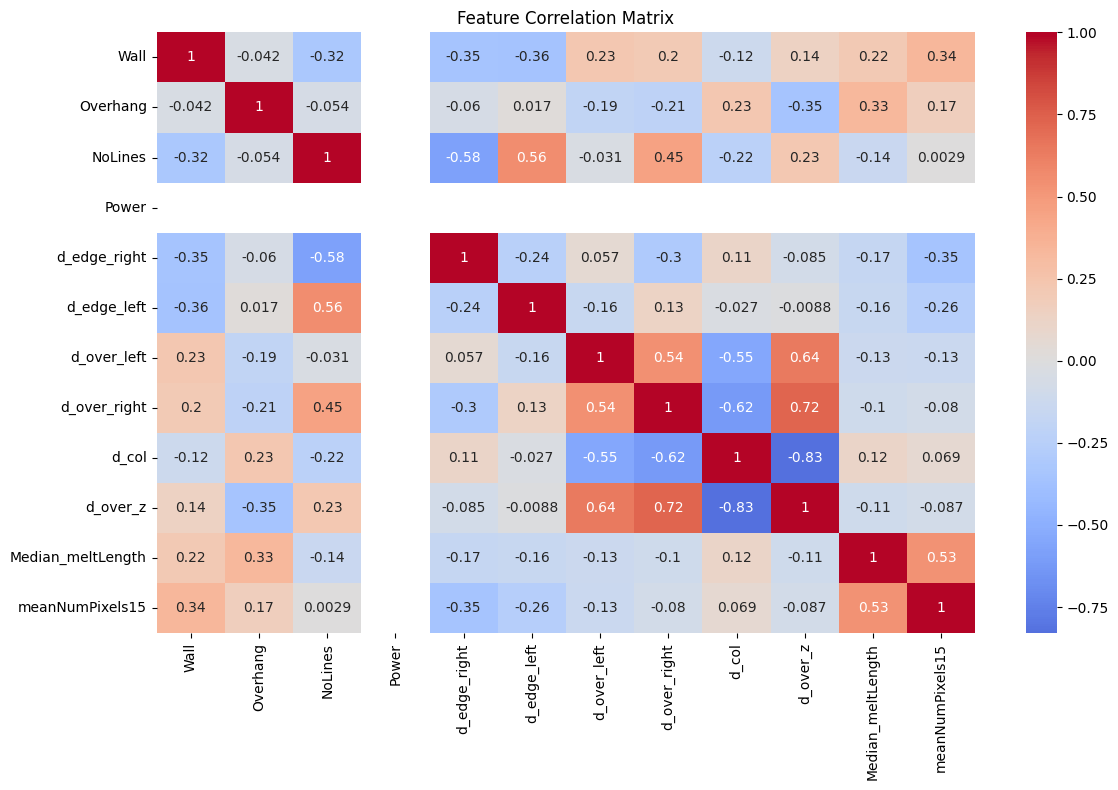


Feature Selection Summary:
--------------------------------------------------

Target: Median_meltLength
------------------------------

Top features by correlation:
Overhang        0.332489
Wall            0.218441
d_edge_right    0.167484
d_edge_left     0.157559
NoLines         0.143983
d_over_left     0.127063
d_col           0.116860
d_over_z        0.106838
d_over_right    0.102456
Power                NaN
Name: Median_meltLength, dtype: float64

Top features by mutual information:
d_edge_right    0.148372
NoLines         0.145949
d_edge_left     0.119958
d_over_left     0.052137
d_over_z        0.048752
d_col           0.030779
d_over_right    0.029565
Wall            0.029310
Overhang        0.026466
Power           0.000000
Name: Median_meltLength, dtype: float64

Top features by Random Forest importance:
d_edge_right    0.319532
NoLines         0.149214
d_edge_left     0.133766
d_over_z        0.118826
d_over_left     0.089339
d_col           0.086452
Overhang        0.07993

In [21]:
all_features = ['Wall', 'Overhang', 'NoLines', 'Power', 
                'd_edge_right', 'd_edge_left', 'd_over_left', 
                'd_over_right', 'd_col', 'd_over_z']
target_cols = ['Median_meltLength', 'meanNumPixels15']

# Run the analysis
feature_analysis = analyze_features(data, all_features, target_cols)

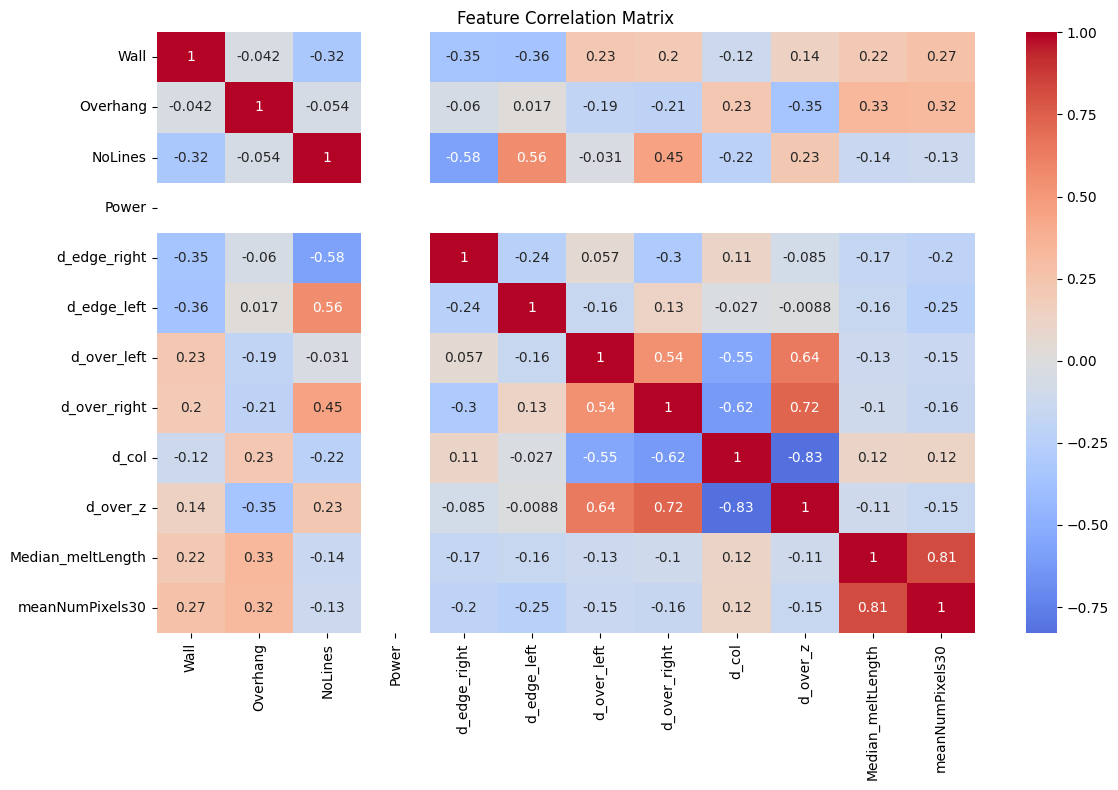


Feature Selection Summary:
--------------------------------------------------

Target: Median_meltLength
------------------------------

Top features by correlation:
Overhang        0.332489
Wall            0.218441
d_edge_right    0.167484
d_edge_left     0.157559
NoLines         0.143983
d_over_left     0.127063
d_col           0.116860
d_over_z        0.106838
d_over_right    0.102456
Power                NaN
Name: Median_meltLength, dtype: float64

Top features by mutual information:
NoLines         0.187612
d_edge_right    0.157822
d_edge_left     0.130130
Overhang        0.040573
d_over_left     0.038812
d_over_z        0.035507
Wall            0.028750
d_col           0.015942
d_over_right    0.008420
Power           0.000000
Name: Median_meltLength, dtype: float64

Top features by Random Forest importance:
d_edge_right    0.319532
NoLines         0.149214
d_edge_left     0.133766
d_over_z        0.118826
d_over_left     0.089339
d_col           0.086452
Overhang        0.07993

In [22]:
all_features = ['Wall', 'Overhang', 'NoLines', 'Power', 
                'd_edge_right', 'd_edge_left', 'd_over_left', 
                'd_over_right', 'd_col', 'd_over_z']

target_cols = ['Median_meltLength', 'meanNumPixels30']

# Run the analysis
feature_analysis = analyze_features(data, all_features, target_cols)

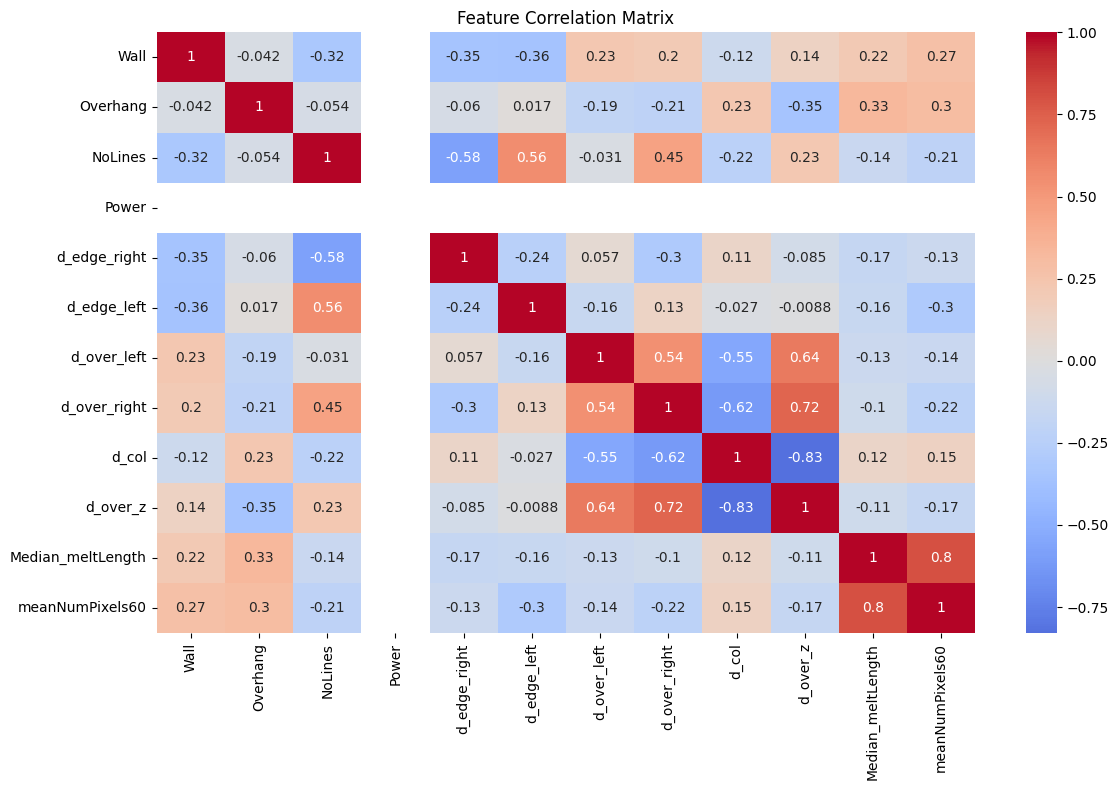


Feature Selection Summary:
--------------------------------------------------

Target: Median_meltLength
------------------------------

Top features by correlation:
Overhang        0.332489
Wall            0.218441
d_edge_right    0.167484
d_edge_left     0.157559
NoLines         0.143983
d_over_left     0.127063
d_col           0.116860
d_over_z        0.106838
d_over_right    0.102456
Power                NaN
Name: Median_meltLength, dtype: float64

Top features by mutual information:
NoLines         0.170961
d_edge_right    0.159400
d_edge_left     0.134846
d_over_left     0.043792
Overhang        0.042177
Wall            0.024148
d_over_right    0.011352
d_over_z        0.005353
Power           0.000000
d_col           0.000000
Name: Median_meltLength, dtype: float64

Top features by Random Forest importance:
d_edge_right    0.319532
NoLines         0.149214
d_edge_left     0.133766
d_over_z        0.118826
d_over_left     0.089339
d_col           0.086452
Overhang        0.07993

In [23]:
all_features = ['Wall', 'Overhang', 'NoLines', 'Power', 
                'd_edge_right', 'd_edge_left', 'd_over_left', 
                'd_over_right', 'd_col', 'd_over_z']

target_cols = ['Median_meltLength', 'meanNumPixels60']

# Run the analysis
feature_analysis = analyze_features(data, all_features, target_cols)

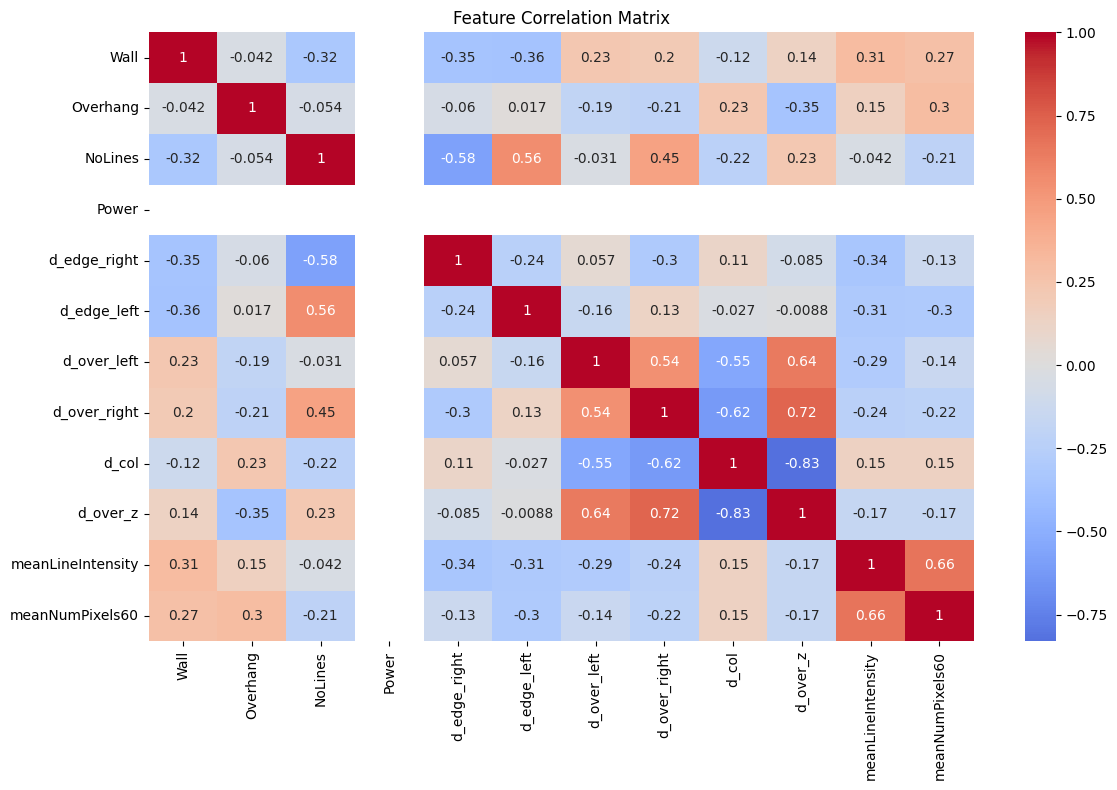


Feature Selection Summary:
--------------------------------------------------

Target: meanLineIntensity
------------------------------

Top features by correlation:
d_edge_right    0.340207
Wall            0.311209
d_edge_left     0.307040
d_over_left     0.292680
d_over_right    0.238267
d_over_z        0.170370
Overhang        0.149884
d_col           0.146904
NoLines         0.042299
Power                NaN
Name: meanLineIntensity, dtype: float64

Top features by mutual information:
d_over_left     1.550240e-01
d_edge_right    1.101266e-01
d_over_right    7.878873e-02
d_over_z        7.632541e-02
d_edge_left     6.680317e-02
Wall            6.285388e-02
NoLines         6.243239e-02
d_col           3.683482e-02
Overhang        1.887273e-02
Power           3.330669e-16
Name: meanLineIntensity, dtype: float64

Top features by Random Forest importance:
d_edge_right    0.301409
d_edge_left     0.225122
d_over_left     0.191932
d_over_right    0.123268
NoLines         0.067844
d_over_z

In [24]:
all_features = ['Wall', 'Overhang', 'NoLines', 'Power', 
                'd_edge_right', 'd_edge_left', 'd_over_left', 
                'd_over_right', 'd_col', 'd_over_z']

target_cols = ['meanLineIntensity', 'meanNumPixels60']

# Run the analysis
feature_analysis = analyze_features(data, all_features, target_cols)